<a href="https://colab.research.google.com/github/doeungim/ADP_DE/blob/main/%EB%B6%84%ED%8F%AC/%ED%86%B5%EA%B3%84%EB%AC%B8%EC%A0%9C%EB%AA%A8%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이항분포

In [85]:
from scipy.stats import binom ,bernoulli, geom
from scipy.stats import stats , t, norm

사회과학자가 주장하기를 대학교에 입학할 능력이 있는 실업계 고등학생 중 50%만이 대학에 진학 한다고 한다. 만약 사회과학자의 주장이 맞다면 17명의 대학교에 입학할 능력이 있는 실업계 학생 중 10명이 대학교에 진학할 확률은 얼마인가? 또한 17명 중 대학교에 진학할 학생수의 기댓값은 얼마인가?

In [86]:
rv = binom(17, 0.5)

# 10명이 갈 확률
p = rv.pmf(10)
print(p)
print(f"기대값 {rv.mean()}")

0.14837646484375
기대값 8.5


어느 운전학원을 이수한 사람이 각 시험에서 운전면허를 취득할 확률이 0.8이라고 하고, 각각의 시 험이 서로 독립이라고 할 때 </br>
(1) 두 번의 시험 안에 운전면허를 취득할 확률은? </br>
(2) 세 번의 시험 후에도 운전면허를 취득하지 못할 확률은?

In [87]:
p = 0.8

#1) 두 번의 시험 안에 취득
## 1) 이항분포 : 고정횟수 2번안에 성공할 확률을 구하는 법
rv = binom(2, 0.8)
# rv.cdf(0) 0번 성공할 확률 = 두번의 시험에서 모두 실패할 확률 계산 후, 1- 는 두번의 시험중 적어도 한번은 성공할 확률
p = 1- rv.cdf(0)
print(p)

## 2) 기하분포 : 처음으로 성공할 때 까지의 시행횟수
rv = geom(0.8)
rv.cdf(2)

# 2) 세번 이후에도 취득 못함
# 이항분포 : 3번 중 0번 성공할 확률 *
p = binom.pmf(0,3, 0.8)
print(p)

#기하분포
p = 1 - geom.cdf(3, 0.8)
print(p)


0.96
0.007999999999999997
0.008000000000000007


멘델의 법칙에 의하면 빨간색과 흰색이 섞여 있는 꽃나무를 자가수정시켜 얻은 꽃나무의 25%는 빨간 꽃을 피우게 된다고 한다. 만약 5그루의 혼합 색의 꽃나무를 자가수정시켜 5그루의 꽃나무를 얻었 을 때 다음의 확률을 구하라.  </br>
(1) 빨간색 꽃나무가 하나도 없다.  </br>
(2) 빨간색 꽃나무가 4개 이상이다.

In [88]:
rv = binom(5, 0.25)

# 1) P(X = 0)
p = rv.pmf(0)
print(round(p),2)

# 2) P(X >= 4) 즉 1 - P(X < 3)
print(1 - rv.cdf(3))
print(round(rv.pmf(4) + rv.pmf(5)),2)

0 2
0.015625
0 2


미국의 백인 중 85%가 Rh十의 혈액형을 가지고 있다고 한다. 이 중에서 7명을 임의로 선택하였을 때 다음의 확률을 구하라. </br>
(1) 적어도 5명이 Rh +의 혈액형을 가지고 있다. </br>
(2) 많아야 3명이 Rh—(Rh+가 없는 것)의 혈액형을 가지고 있다.

In [89]:
rv = binom(7, 0.85)

# 1) P(X >= 5)
print(1 - rv.cdf(5))
print(rv.pmf(5) + rv.pmf(6) + rv.pmf(7))

# 2) P(X < 3)
rv = binom(7, 0.15)
print(round(rv.cdf(3),4))

0.7165840796874998
0.9262348398437503
0.9879


정팔면체 주사위에 1~8까지 숫자가 적혀있다. 8번 주사위를 던졌을 때 다음의 확률을 구하여라 </br>
(1) 숫자 1이 한 번만 나오는 경우 </br>
(2) 숫자 2 또는 4가 5회 이상 나오는 경우 </br>
(3) 숫자 3이 적어도 3회 나오는 경우 </br>
(4) 숫자 5가 많아야 3회 나오는 경우

In [90]:
p = 1/8
n = 8

rv = binom(n, p)

# 1) P(X =1)
p1 = rv.pmf(1)
print(p1)
# 2) 2 or 4 가 5회 이상 (1/4)
p2 = 1 - binom.cdf(4, n, 2/8)
print(p2)
# 3) 적어도 3회 P(X <=3) : 1 - 2회 나올 확률
print(1 - rv.cdf(2))
# 4) 많아야 3회 : 3회 이하가 나올 확률
print(rv.pmf(3))

0.3926959037780762
0.0272979736328125
0.06734722852706909
0.05609941482543942


어떤 병이 새로운 치료 방법으로 치유될 확률이 50%인데 15명의 환자에게 치료법을 적용

In [91]:
rv = binom(15, 0.5)

# 1) 6명 이하가 치유 P(X <= 6)
rv.cdf(6)
# 2) 6명 이상 , 10명 이하가 치유 (6 ~10) = 1- 5
rv.pmf(6) + rv.pmf(7) + rv.pmf(8) + rv.pmf(9) + rv.pmf(10)
rv.cdf(10) - rv.cdf(5)
# 3) 12명 이상 : 15 - 12
1 - rv.cdf(11)

0.017578125

전체 청소년의 40%가 11시 이전에 잠을 잔다. 10명의 청소년 중에 3명이 11이전에 잠을 잘 확률

In [92]:
binom.pmf(3, 10, 0.4)

0.21499084799999976

조사결과 70%의 성인 여성이 2년동안 적어도 1번 내과를 찾는다. 19명의 성인 여성이 임의로 추출

In [93]:
rv = binom(19, 0.7)
# 1) 14명 미만이 내과를 찾음
print(rv.cdf(13))

# 2) 적어도 17명이 내과를 찾음 = 17명 이상 즉, 1- 16명
1 - rv.cdf(16)

0.526137475726486


0.04622368312925795

유전법칙에 따르면 완두콩의 우성교배를 통한 자손은 네 가지 형태이고 각각의 비율이 둥글고 노 란 것, 쭈그러지고 노란 것. 둥글고 녹색인 것, 쭈그러지고 녹색인 것이 9 : 3 : 3 : 1이라고 한다. </br>
확률변수 X를 130개의 우성교배 자손에서 둥글고 노란 것의 개수라고 할 때, X의 평균과 표준편차를 구하라. </br>


In [94]:
total = 9 + 3 + 3 + 1
round_yellow = 9

rv = binom(130 , round_yellow / total)
print(rv.mean() , rv.std())

73.125 5.656163673374383


길동이는 자신이 초능력을 가지고 있다고 주장하고 있다. 이 주장을 확인하기 위해 5가지의 다른 그림이 그려진 카드를 준비하고 길동이의 눈을 가리고 5장의 카드 중 하나를 선택한 다음 5가지의 카드 중 어느 카드가 선택되었는지에 대해 물어보는 작업을 16회 실시하였다. 사실은 길동이는 초능력이 없고, 임의로 대답하였다고 하자. </br>
(1) 카드가 무엇인지 맞추는 횟수가 3회 이하일 확률은 얼마인가? </br>
(2) 카드가 무엇인지를 못 맞추는 횟수가 10회 이상일 확률은 얼마인가?

In [95]:
# 16번 시도 중 5장 중에 하나를 선택
rv = binom(16, 1/5)
# 1) 3회 이하
print(rv.cdf(3))
# 2) 성공하지 못할 횟수가 10회 이상 = 6번 성공
print(rv.cdf(6))

0.5981343255101437
0.973342668488704


## 음이항 분포
- N 번 째 성공을 얻기 위한 실패의 수 (K)
from scipy.stats import nbinom


어떤 축구 선수의 패널티킥 성공률을 70%라고 하자. 어느날 10번 성공할때까지 패널티킥 연습을 한다고 할 때 12번 이상 시도해야할 확률

In [96]:
# 기하 분포 : 1st 성공을 위한 실패 횟수
# 음이항 분포 : N 번째 성공을 위한 실패 횟수
from scipy.stats import nbinom
#  풀이) 음이항 분포 nbinom : 12번 이상 = 1 - 11
1 - nbinom.cdf(11, 10, 0.7)

0.00874015800396255

마케팅 팀이 새로운 광고 캠페인을 시작했다. 광고를 본 후 제품을 구매하는 고객의 비율이 12%로 알려져 있다. </br>
(1) 적어도 한 명의 고객이 제품을 구매하기까지 광고를 본 평균 고객 수는 몇 명인가? </br>
(2) 적어도 3명의 고객이 제품을 구매하기까지 광고를 본 고객 수가 10명을 초과할 확률은 얼마인가? </br>
(3) 5명의 고객이 제품을 구매하기 까지 필요한 광고를 본 고객수의 기대값과 분산은 얼마인가? </br>

In [97]:
# 1) 적어도 1명 = 1명 이상
print(1/12)

# 2) 적어도 3명 = 3명 이상
1 - nbinom.cdf(10 , 3, 0.12)

# 3) 기대값 : 5 / 0.12
# 4) 분산
5 * (1 - 0.12) / 0.12 **2

0.08333333333333333


305.5555555555556

## 기하분포 geom
- 1st 성공까지의 "실패 횟수"

한 스타트업 회사가 새로운 제품을 출시하였고, 각 고객 방문 시 제품 구매 확률이 0.1이라고 한다. </br>
(1) 최소 한 명의 고객이 제품을 구매하기 까지 방문하는 고객 수가 4명일 확률은? </br>
(2) 회사는 최소 한 명의 고객이 제품을 구매하기까지 방문하는 고객 수가 5명 이하일 확률은? </br>

In [98]:
rv = geom(0.1)

# 1) 4번째 방문자까지 처음 구매할 확률
rv.pmf(4)

# 2) 5명 이하일 확률 = 5명까지의 누적
rv.cdf(5)

0.40951000000000004

## 초기하분포 hypergeom
- 비복원 추출일때, 특정 성공의 횟수를 계간
- hypergeom.cdf(k,M, n, N)

특정지역의 성별에 따른 감기 검사결과이다. </br>

감기	양성	음성 </br>
남자	16	54 </br>
여자	12	23 </br>
(1) 다섯명의 사람을 임의로 선택하였을 때, 감기에 양성 반응인 사람이 1명일 확률은? </br>
(2) 열두명의 사람을 임의로 선택하였을 때, 감기에 양성 반응인 사람이 6명 이상일 확률은? </br>
(3) 4명의 남자, 2명의 여자가 임의로 선택되었을 때, 감기에 양성 반응인 사람이 없을 확률은? </br>

In [99]:
from scipy.stats import hypergeom

total = 14 + 54 + 12 + 23
positive = 16 + 12  #감기 양성

# 1) N = 5, positive = 1
hypergeom.pmf(1, total, positive, 5)
# 2) N = 12 , positive >= 6
1 - hypergeom.cdf(6, total, positive, 12)

# 3) 남자 / 여자 / 양성 남자/ 양성 여자
m = 16 + 54
f = 12 + 23
pm = 16
pf = 12

no_positive_m = hypergeom.cdf(0 , total, positive , 4)
no_positive_f = hypergeom.cdf(0 , total, positive , 2)
# 둘 다 양성 반응이 없음
print(no_positive_m * no_positive_f)

0.14522626097843364


나사 생산 공장에서 52개를 생산 했는데, 이중 7개의 불량품이 섞여 있었다.
어느 고객이 15개를 구매 했는데 이 중에서 불량인 나사가 많아야 3개일 확률을 구하여라.

In [100]:
hypergeom.cdf(3, 52, 7, 15)

0.9043412184485266

어느 자동차 회사의 본사에서 여러 지방 영업소에 내려보낸 48대의 새 차 중 12대에 불량 오디오가 설치되었다고 한다. 어느 영업소가 8대를 인수하였는데 이 중에서 오디오가 불량인 차가 적어도 1 대 이상이 될 확률을 구하라.

In [101]:
# 적어도 한대 이상 1 - cdf(0)
1 - hypergeom.cdf(0 , 48, 12, 8)

0.9198080808981831

어느 회사에서 사원을 8명 모집하기 위해 신문에 광고를 내었더니 15명의 남자와 8명의 여자가 지원하였다.
임의로 8명을 선택한다고 한다면 8명 중 여자가 3명 이상일 확률을 구하라. 예상되는 여자 신입사원은 몇 명이 되겠는가?

In [102]:
total = 15 + 8
female_total = 8

# P(X >= 3) 3명 이상 = 1-2
p = 1 - hypergeom.cdf(2 , total, female_total , 8)
print(p)

# 기대값
(female_total / total) * 8

0.59606497061067


2.782608695652174

어느 대학에서 전체 50명의 교수 중에서 5명을 뽑아 위원회를 구성한다. 통계학과에 6명의 교수가 있다고 하자.

In [103]:
# 1) 위원회에 통계학과 교수가 한명도 없을 경우
print(hypergeom.pmf(0 , 50, 5 , 6))

# 2) 적어도 1명 이상의 통계학과 교수가 포함될 확률
print(1 - hypergeom.cdf(0 , 50, 5 , 6))

0.5125677282939077
0.48743227170609227


## 포아송 분포
단위 시간 또는 공간에서 특정 사건이 발생하는 횟수를 나타내는 이산 확률 분포

어떤 골목 특정 지점에서 하루 평균 3회의 사고가 발생한다고 한다. 특정하루 동안 </br>
(1) 0회의 사고가 발생할 확률은? </br>
(2) 4회 이상의 사고가 발생할 확률은?

In [104]:
from scipy.stats import poisson
lamb = 3
# 1)
print(poisson.pmf(0, lamb))
# 2) 4회 이상 : 1 - cdf(3)
print(1 - poisson.cdf(3, lamb))

0.049787068367863944
0.35276811121776874


어느 중학교는 지난 5년간 매년 300명(10개반, 각 반 30명)의 신입생을 받았다. 각 반에서 평균적으로 2명의 학생이 왼손잡이인 것으로 나타났다. 올해에도 왼손잡이 학생의 비율이 예년과 같다고 가정할 때, 임의로 한 개의 반 학생들 중 왼손잡이 학생이 4명 이하일 확률은 얼마인가?

In [105]:
lamb = 2
# 4명 이하일 확률 : 4까지의 누적
poisson.cdf(4, lamb)

0.9473469826562889

경부고속도로상의 어느 휴게소의 주유소는 평균적으로 5분에 6대 꼴로 차들이 기름을 넣으러 온다고 하자 이때 어느 특정한 1분 동안 다음의 확률을 구하라 </br>
(1)2대 이하가 기름을 넣으러 온다. </br>
(2) 2대 혹은 3대가 기름을 넣으러 온다.

In [106]:
lamb = 6/5
# 1) 2대 이하 : 2까지의 누적
print(poisson.cdf(2, lamb))
# 2) 2 혹은 3 : 2일때, + 3일 때
print(poisson.pmf(2, lamb) + poisson.pmf(3, lamb))

0.8794870987836302
0.30360376560749974


## 지수 분포
어떤 사건이 처음 발생할 때 까지의 "경과 시간"에 대한 연속확률 분포 / 첫 사건이 생기는 걸리는 시간의 분포

In [107]:
from scipy.stats import expon
#rv = expon(scale = Lambda)   # 주의 scale에 대해서 람다값을 넣어줘야함

(1) 평균 사건 발생률이 분당 2회인 시스템에서, 다음 사건이 발생하기까지 1분 이내일 확률은 얼마인가? </br>
(2) 같은 시스템에서, 다음 사건이 발생하기까지 3분 이상 걸릴 확률은 얼마인가? </br>
(3) 해당 시스템에서 다음 사건이 발생하기까지의 시간의 기대값과 표준편차는 얼마인가?

In [108]:
# 1)
lamb = 2
p1 = expon.cdf(1, scale = 1/ lamb)
print(p1)

# 2) 3분이상 걸릴 확률
p2 = expon.cdf(3, scale = 1/ lamb)

# 3) 기대값과 표준 편차는 : 1/ lambda  : 1/2

0.8646647167633873


### 기출 ADP_29 )
 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오

In [109]:
rv = binom(25, 0.03)
print(rv.pmf(3))

0.03177384363983214


### 기출 ADP_30 )
딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라. </br>
딸이 4명 이상일 확률을 구하고 그 확률이 5가족 중 3가족 이상일 확률을 구한다.
먼저 어떤 가족이 자녀 6명 중, 딸이 4명 이상일 확률을 구한다.

In [110]:
n = 6  # 시행횟수
p = 0.5 #딸인 경우

rv = binom(n, p)
# 6명 중, 딸이 4명 이상일 경우
p2 = 1 - rv.cdf(3)
print(p2)
# 5가족 중 3 가족 이상 일 경우, 1 - cdf(2)
rv2 = binom(5, p2)
print(1 - rv2.cdf(2))

# 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대하는가
rv2.mean()

0.34375
0.2255459427833557


1.71875

### 기출 ADP_31 )
유기견이 하루에 2.2마리 발생한다 (10점)

In [111]:
# 1. 한마디로 안 버려질 확률
lamb = 2.2
from scipy.stats import poisson

print(poisson.pmf(0, lamb))

# 2. 적어도 2 마리 버려질 확률 = 2 마리 이상 : 1 - cdf(1)
print(1- poisson.cdf(1, lamb))

0.11080315836233387
0.6454298932405317


어떤 앱 개발 회사가 새로운 게임을 출시했다. 사용자가 게임 내에서 특정 퀘스트를 클리어하는 성공 확률이 0.3이라고 한다. </br>
 (1) 사용자가 총 3회의 성공을 하기까지 시도한 횟수가 5회 미만일 확률은 얼마인가?  </br>
 (2) 사용자가 4번의 퀘스트 클리어 성공을 경험하기까지 평균적으로 몇 번의 시도를 하는가?

In [112]:
# 음이항 분포
p = 0.3
r = 3
# 1) 5회 미만  : 4번 이내에 3번 성공 = 3번 + 4번 시도에서 3번 성공하는 경우를 합한 확률
prob = nbinom.cdf(4-3, r, p)
print(prob)

# 2) 기대값
4 / p

0.0837


13.333333333333334

한 제조회사에서는 제품의 품질을 보장하기 위해 생산 라인에서 무작위로 10개의 제품을 샘플링하여 품질 검사를 실시한다. 이때, 제품이 불량일 확률은 23%다. </br>

(1) 적어도 3개의 제품이 불량일 확률은? </br>
(2) 2개 이하의 제품이 불량일 확률은?

In [113]:
rv = binom(10, 0.23)

# 1) 적어도 3개 = 3개 이상 1 - cdf(2)
print(1 - rv.cdf(2))

# 2) 2개 이하
print(rv.cdf(2))

0.4137172738381183
0.5862827261618817


느 고객 서비스 센터에는 센터에는 평균적으로 1분에 3건의 전화가 걸려온다. 전화 빈도는 아래와 같은 조건을 가진다. 전화가 걸려오는 사건이 독립적이다. 특정 시간 동안에 전화가 걸려올 확률이 일정하다. 단위 시간 내에 동시에 두 개 이상의 전화가 걸려올 확률은 매우 낮다. </br>

(1) 10분 동안 전화가 23통 이하로 걸려올 확률은? </br>
 (2) 10분 동안 전화가 정확히 30통 걸려올 확률은?

In [114]:
# 3 * 10
lamb = 30
# 1) 23통 이하
print(poisson.cdf(23, lamb))
# 2) 정확히 30통
print(poisson.pmf(30, lamb))

0.11464591271427384
0.07263452647159181


어느 지역의 미세 지진 발생 간격은 평균 10년이다. 이 지진 발생 간격은 지수 분포를 따른다고 가정한다.
최근 지진 이후 5년이 지난 시점에서 7년 이내에 지진이 발생하지 않을 확률은?

In [115]:
from scipy.stats import expon
mean = 10

# 사건 발생률
value = 1 / mean
# 7년 이내 지진이 발생하지 않을 확률
proba = 1 - expon.cdf(7, scale = mean)
print(proba)

0.4965853037914095


### 정규 분포

확률변수 X가 N(60, 16)을 따른다고 하였을 때 P[55<X<63]을 계산하라.

In [116]:
from scipy.stats import norm

rv = norm(60, 4)
print(rv.cdf(63) - rv.cdf(55))

0.6677228739562764


어느 회사에 입사를 희망한 지원자의 영어점수는 평균이 700이고 표준편차가 100인 정규분포를 따른다고 한다. 한 지원자의 점수가 다음과 같을 확률을 구하라 </br>
(1) 850점 이상의 점수를 받는다. </br>
(2) 450점 이하의 점수를 받는다. </br>
(3) 525점에서 875점 사이의 점수를 받는다.

In [117]:
rv = norm(700, 100)

# 1) P(X > 850) 850 이상
p1 = 1 - rv.cdf(850)
# 2) 450 이하
p2 = rv.cdf(450)
# 3)
p3 = rv.cdf(875) - rv.cdf(525)
print(p1, p2, p3)

0.06680720126885809 0.006209665325776132 0.9198816862723658


의사들이 참고로 사용하는 어린이 성장표에 따르면 생후 2년 된 남아의 키는 평균이 88 cm이고 표준편차가 3.3 cm인 정규분포를 따른다고 한다. 만약 임의로 생후 2년 된 한 남아를 선택하였을 때, 키가 85.3 cm에서 93.2 cm 사이일 확률은 얼마

In [118]:
rv = norm(88,3.3)
print(rv.cdf(93.2) - rv.cdf(85.3))

0.7358324708035097


보고서에 따르면 성인 남자의 키는 평균이 175.3 cm이고 표준편차가 7.1 cm인 정규분포 를 따른다고 한다. 한 의류회사에서는 남자들의 키 가운데 80%를 목표로 하여 제품을 생산하려고 한다. 이들이 목표로 세우려는 키의 범위를 구하라.

In [119]:
# 평균과 표준편차
mean = 175.3
std_dev = 7.1

# 80% 범위는 10%에서 90%까지를 포함
lower_bound = norm.ppf(0.1, loc=mean, scale=std_dev)
upper_bound = norm.ppf(0.9, loc=mean, scale=std_dev)


print(f"80%에 해당하는 키 범위: {lower_bound:.2f} cm ~ {upper_bound:.2f} cm")

#z_score = stats.norm.ppf((1 + confidence_level) / 2)
#lower_bound = mean - z_score * std_dev
#upper_bound = mean + z_score * std_dev

80%에 해당하는 키 범위: 166.20 cm ~ 184.40 cm


어느 도시에서 지난 5년 간의 조사결과 성인 전체의 30%가 정기적으로 술을 마시는 것으로 나타났 다고 하자. 만약 현재도 이와 비슷한 비율이 유지된다면 1,000명의 성인표본에서 술을 마시는 사람의 수가  280명보다 작을 확률은 얼마인가?

결정 기준: </br>
 1. 이항분포 사용: </br>
 표본 크기가 작거나 중간일 때 (e.g., 몇십에서 몇백명).  문제에서 사건이 두 가지 결과(성공/실패)를 가지며, 성공 확률이 일정할 때. </br>

 2. 정규분포로 근사: </br>
 표본 크기가 매우 클 때 (일반적으로 30 이상).
 이항분포의 정규 근사는  기대값 충분히 클 때 가능하며, 주로 np≥ 5 이거나  n(1-p) >= 5 조건을 만족해야함

In [120]:
import numpy as np
n = 1000
p = 0.3

mean = n * p
std =  np.sqrt(n * p * (1- p))

# 280명 보다 작을 확률
norm.cdf(280 , loc = mean , scale = std)

0.08377313874430853

In [121]:
p = 0.3
n = 1000
k = 279 # 280명 미만

binom.cdf(k, n, p)

0.07787874350831679

### Revise
어떤 사람의 전화 통화시간은 평균이 80초이고 표준편차가 15초인 정규분포를 따른다고 한다. 이 사람이 100번 통화했을 때, 100번 통화 중 통화시간이 92초 이상인 횟수가 25번 이상일 확률

In [122]:
rv = norm(80, 15)

# 92초 이상인 확률
p1 = 1 - rv.cdf(92)

# 25번 이상일 확률 : 1 - cdf(24)
bi_rv = binom(100, p1)
print(1 - bi_rv.cdf(24))

0.2063012012870048


어떤 순간접착제의 접착력은 평균이 50 kg이고 표준편차가 4 kg인 정규분포를 따른다고 한다. 이 순간접착제를 49 kg의 힘으로 실험할 때, 떨어질 확률은 얼마인가

In [123]:
mean = 50
std = 4

 # 49kg 이하에서 떨어질 확률 = 49kg의 힘으로 실험할 떄 떨어질 확률
norm.cdf(49, loc = mean, scale = std)

0.4012936743170763

세금 청구서에 대해 9%가 연체된다고 한다. 2만 개의 청구서가 발행되었을 때, 다음의 확률을 구하라 </br>
(1) 1750개 미만의 청구서가 연체된다. </br>
(2) 2000개 이상의 청구서가 연체된다.

In [124]:
p = 0.09
n = 20000

# X < 1750
p1 = binom.cdf(1750 ,n, p)

# X >= 2000
p2 =1 - binom.cdf(1999, n, p)

print(p1 , p2)

0.11032961732566503 6.042136680983745e-07


# 표집 분포

평균이 82이고 분산이 144인 모집단에서 임의추출한 표본에 대하여 생각해 보자. </br>
(1) 표본의 크기가 64일 때 표본평균이 구간 (80.8, 83.2)에 있을 확률은? </br>
(2) 표본의 크기가 100일 때 표본평균이 구간 (80.8, 83.2)에 있을 확률은?

In [125]:
rv= norm(82, 12/8)
p1 = rv.cdf(83.2) - rv.cdf(80.8)
print(p1)

# 표준오차 np.sqrt(var) / np.sqrt(n)
s = np.sqrt(144) / np.sqrt(64)
p8083 = norm.cdf(83.2 , loc = 82, scale = s) - norm.cdf(80.8 , loc = 82, scale = s)
print(p8083)

# 표본 오차 : 표준편차 / np.sqrt(n)
s1 = np.sqrt(144) / np.sqrt(100)
p18083 = norm.cdf(83.2 , loc = 82, scale = s1) - norm.cdf(80.8 , loc = 82, scale = s1)
print(p18083)

rv = norm(82, 12 / 10)
p2 = rv.cdf(83.2) - rv.cdf(80.8)
print(p2)


0.5762892028332078
0.5762892028332078
0.6826894921370872
0.6826894921370872


한 제과회사에서는 소유하고 있는 포장기계에서 나오는 과자의 무게는 평균이 정해진 무게이고 표준편차는 3.459g인 정규분포를 따른다고 한다. 회사는 소비자 단체와의 마찰을 피하기 위해 450g이라고 표시된 과자를 포장하는 과정에 기계를 455g 포장하도록 맞추어 놓았다. </br>
(1) 9개의 과자를 표본으로 선택하였을 때, 표본평균이 450g 보다 작을 확률은 얼마인가? </br>
(2) 오랜 시간 동안 이 기계를 사용하였을 때. 몇 %의 과자 무게가 450g 보다 적겠는가?

In [126]:
rv = norm(455, 3.459 / 3)
p = rv.cdf(450)
print(p)

p2 = norm(455, 3.459).cdf(450)
print(p2)

# 1) GPT 풀이
mean = 455
std_error = 3.459 / np.sqrt(9)
less_thean_450 = norm.cdf(450, loc = mean, scale = std_error)
print(less_thean_450)
# 2)
norm.cdf(450, loc = mean, scale = 3.459)

7.238028870950395e-06
0.07415811762619638
7.238028870950395e-06


0.07415811762619638

어느 포장기계를 이용하여 생산한 제품의 무게는 평균은 기계를 세팅한 값이며, 표준편차는 4 g인 정규분포를 따른다고 한다. 다음 물음에 답하라. </br>
(1) 기계를 120 g으로 세팅했을 때, 25개 표본의 평균 무게가 119 g 이상일 확률을 구하라. </br>
(2) 25개 표본의 평균 무게가 118 g 이상일 확률이 0.95가 되기 위해서는 이 기계를 몇 g으로 세팅하여야 하는가?

In [127]:
# 1)
mean = 120
std_error = 4 / np.sqrt(25)
print(1 - norm.cdf(119, loc = mean, scale = std_error))

rv = norm(120, 4/5)
print(1 - rv.cdf(119))


# 2)
std = 4 / np.sqrt(25)
# 118g 이상일 확률이 0.95 일때, Z값
z_value = norm.ppf(0.05)
# Z 공식 (X - mean) / std_error
mean_setting = 118 - (z_value * std_error)
print(mean_setting)


0.8943502263331446
0.8943502263331446
119.31588290156118


만 2세가 된 유아의 키는 평균이 87.6 cm이고 표준편차가 3.3 cm인 정규분포를 따른다고 한다. 만약 6명의 2세 된 유아의 키를 조사하였을 경우 표본평균이 86.6 cm에서 89.4 cm 사이일 확률은 얼마인가?

In [128]:
mean = 87.6
std_error = 3.3
s = std_error / np.sqrt(6)
print(norm.cdf(89.4, loc = mean, scale = s) - norm.cdf(86.6, loc = mean, scale = s))


rv = norm(87.6, 3.3 / np.sqrt(6))
rv.cdf(89.4) - rv.cdf(86.6)

0.6802773076561102


0.6802773076561102

어떤 과수원에 있는 배의 무게는 평균이 445 g이고 표준편차가 36.2 g인 정규분포를 따른다고 한다. </br>
(1) 만약 하나의 배를 임의로 선택하여 무게를 재었을 때, 무게가 426.9 g에서 454.05 g 사이일 확률은 얼마인가? </br>
(2) 4개의 배를 임의로 선택하여 무게의 평균을 J 라고 할 때, 그 값이 426.9 g에서 454.05 g 사이일 확률은 얼마인가?

In [129]:
# 1)
mean = 445
std = 36.2
print( norm.cdf(454.05, loc=mean, scale=std) - norm.cdf(426.9, loc=mean, scale=std))

rv = norm(445,36.2)
print(rv.cdf(454.05) - rv.cdf(426.9))

# 2)
s = std / np.sqrt(4)
print( norm.cdf(454.05, loc=mean, scale=s) - norm.cdf(426.9, loc=mean, scale=s))

rv =  norm(445,36.2/2)
print(rv.cdf(454.05) - rv.cdf(426.9))

0.29016878695693715
0.29016878695693715
0.5328072073425565
0.5328072073425565


In [130]:
mean = 445
std_dev = 36.2

# 426.9g ~ 454.05g 사이일 확률
p_between = norm.cdf(454.05, loc=mean, scale=std_dev) - norm.cdf(426.9, loc=mean, scale=std_dev)
print(f"426.9g ~ 454.05g 사이일 확률: {p_between:.4f}")

426.9g ~ 454.05g 사이일 확률: 0.2902


###  통계적 추론

어느 전기부품공장에서 자사의 제품 중 전기퓨즈의 평균수명( μ
 )을 알아보기 위해 40개의 표본을 추출하고 그 수명( xi
 )을 조사하여 다음과 같은 결과를 얻었다.
Σxi = 88,  Σxi2 =  212 평균 수명을 추정하고 그 추정량의 표준 오차를 구하여라

In [131]:
# 평균
mean = 88 / 40
n = 40

# 분산 계산
var = (212 - (88**2)/n) / (n-1)
# 표준편차 계산
std = np.sqrt(var)
# 표준오차 계산
std_error = std / np.sqrt(n)

print(std_error)

0.1086041978694737


평균이μ이고 표준편차가 σ=8인 정규분포를 따르는 모집단에서 크기가 25인 표본을 추출하여 평균을 계산하였더니 x =42.7이었다. 이때  μ 에 대한 95%신뢰구간을 구하라.

In [132]:
x = 42.7
sigma = 8
n = 25
confa = 0.05

# Z_value
z_value = norm.ppf(1 - confa/ 2)
# 표준오차
se = sigma / np.sqrt(n)
# ME
ME = z_value * se
print(x - ME, x + ME)

# 라이브러리 검정
norm.interval(0.95, loc = x , scale = se)

39.564057624735916 45.83594237526409


(39.564057624735916, 45.83594237526409)

어느 사과농장에서 올해 수확한 사과의 평균무게  μ
 에 대해 알아보기 위하여 36개의 사과를 추출하여 무게를 측정하였더니  x¯
 =342g, s=20g이 나왔다고한다.
이때  μ
 의 95%와 99% 신뢰구간을 구하고 이를 비교하라

In [133]:
x = 342
s = 20
n = 36

conf1 = 0.05
conf2 = 0.01

# Z_value
z1 = norm.ppf(1 - conf1/2)
z2 = norm.ppf(1 - conf2/2)

# SE
se = s / np.sqrt(n)
# ME (95)
ME_95 = z1 * se
ME_99 = z2 * se

print(x - ME_95 , x + ME_95)
print(x - ME_99 , x + ME_99)

# 라이브러리 검정
print(norm.interval(0.95, loc = x , scale = se))
print(norm.interval(0.99, loc = x , scale = se))

335.46678671819984 348.53321328180016
333.41390232150366 350.58609767849634
(335.46678671819984, 348.53321328180016)
(333.41390232150366, 350.58609767849634)


한 자동차 공장에서 38명의 새로운 직원들이 2주동안의 연수를 마친 후,특정한 작업을 얼마나 빠른 시간안에 해내는지를 측정하였다.
그 작업을 끝내는데 걸리는 시간의 평균과 표준편차가 각각 68초와 12초였다.
모든 직원들이 2주의 교육을 마쳤을 때 그 작업을 마치는 데 걸리는 시간의 평균값의 95% 신뢰구간을 구하라

In [134]:
n = 38
x = 68
std = 12 # 표준편차
confa = 0.05

# Z_value
z_value = norm.ppf(1 - confa / 2)
# SE
se = std / np.sqrt(n)
# ME
ME = z_value * se
print(x - ME, x + ME)

#라이브러리 검정
norm.interval(0.95, loc = x, scale = se)

64.1846222847536 71.8153777152464


(64.1846222847536, 71.8153777152464)

어느 회사에서 생산된 전자레인지 65개를 임의로 뽑아 전자파의 양을 측정하여  x¯
 =0.11, s = 0.06 을 얻었다. 모집단의 평균 전자파량의 95% 신뢰구간을 구하라.

In [135]:
n = 65
x = 0.11
s = 0.06
confa = 0.05

# scale
scale = s /np.sqrt(n)
norm.interval(1- confa, loc = x, scale = scale)

(0.09541378324239001, 0.12458621675760999)

어떤 화학실험에서 구리 침전물량의 표준편차가 4.5g이라고 하자.
이때 모평균에 대한 표본평균의 오차가 1.86g 이하가 될 확률이 최소한 99%가 되도록 한다면 몇 번의 실험을 반복해야 하는가?

In [136]:
std = 4.5
ME = 1.86
confa = 0.01

z = norm.ppf(1 - confa / 2)

(z * std / ME) ** 2

38.83589321617516

(검정) 어느 다이어트 방법을 소개하는 책자에서 주장하기를 그 다이어트 방법을 이용하면 5주 동안 10 kg 넘게 체중을 줄일 수 있다고 한다.
56명을 대상으로 해당 다이어트 방법을 이용하여 5주 동안의 체중 감소량을 조사하였더니 평균이 10.5 kg, 표준편차가 4.5 kg이었다고 한다.
이 자료에 근거해서 그 책자의 주장이 옳다고 할 수 있는지 유의수준 5%로 검정하라.

In [137]:
# 귀무 : 10kg이다
# 대립 : x > 10kg 이다. (오른쪽검정)
n = 56
x = 10.5
std = 4.5
confa = 0.05

mu = 10
# Z_value
z_value = norm.ppf(1 - confa /2)
# SE
se = std / np.sqrt(n)

z_stat = (x - mu) / se
print(z_stat)

# p_value
p_value  = 1 - norm.cdf(z_stat)
print(p_value)

0.8314794192830981
0.2028514249796305


(검정) 한 대학서점으로부터 임의로 추출한 40개의 영수증을 조사한 결과 표본평균  x¯¯¯
 = 5만 원 표본 표준편차 s=9천원이라고 한다.
이 값들을 이용해서 한 번에 판매한 평균액수가 4.6만원 인지에 대해 유의수준 0.05에서 검정하라

In [138]:
n = 40
x = 5
std = 9
conf = 0.05
df = n - 1

mu = 4.6
# t_stat
t_value = t.ppf(1 - conf/2, df)
# se
se = std/ np.sqrt(n)
# 검정통계량
t_stat = (x - mu)/ se
print(t_stat)
# 유의확률
p_value = (1 - t.cdf(np.abs(t_stat),df)) * 2
print(p_value)

if p_value < conf :
  print("귀무가설 기각")
else :
  print('귀무가설 채택')

0.2810913475705229
0.78012630639213
귀무가설 채택


새로운 치료법이 말기 암환자의 생명 연장에 기존의 치료보다 더 효과적이라는 주장이 있다. 기존 의 치료는 오랫동안 사용되어 왔으며 의학잡지의 기록에 의하여 평균 생존기간이 4.2년으로 알려 지고 있다. 새로운 치료법을 80명의 환자들에게 시행하여 그들의 생존기간을 기록한 결과 표본평 균과 표본표준편차는 각각 4.5년과 1.1년으로 밝혀졌다. 위의 주장은 이들 결과에 의해 뒷받침될 수 있는가? 유의수준 =0.05에서 검정하라 또한 p—value값도 계산하라.

In [139]:
# H0 : 새로운 치료법이 더 효과적이지 않다.
# H1 : 더 효과적이다

n = 80
mu = 4.2

x = 4.5
std = 1.1
confa = 0.05

# z_value
z_value = norm.ppf(1 - confa/ 2 )
# SE
se = std / np.sqrt(n)
# Z_stat
z_sta = (x -mu) / se
print(z_sta)

# 유의확률
p_value = 1 - norm.cdf(z_sta)
print(p_value)

2.4393468845452233
0.007356918302264259


한 회사에서는 땅콩, 호두, 마카다미아 등을 혼합하여 캔으로 판매하고 있는데 내용물의 25%가 값 비싼 마카다미아라는 표지를 붙이고 있다고 한다.
이 표지가 과대선전일지도 모른다고 생각한 검사자가 35개의 캔을 임의로 추출하여 마카다미아의 혼합비율을 측정하였다.
이들 측정치들의 평균과 표준편차는 각각 23.5%과 3.1로 밝혀졌다. 이들 결과들은 검사자의 신념을 지지할 수 있는 강한 증 거를 제시하는가?

In [140]:
mu = 25
n = 35
x = 23.5
std = 3.1

confa = 0.05

z_val = norm.ppf(1 - confa /2)
se = std / np.sqrt(n)

z_stat = (mu - x) / se

p_value = (1 - norm.cdf(np.abs(z_stat))) * 2
print(z_stat, p_value)

2.862619249886911 0.004201551212699384


어느 통신판매회사에서는 하나의 새로운 상품을 그 달의 특별상품으로 판매하고자 한다. 그 회사에서 관리하는 만 명의 고객명단에서 임의로 250명을 추출하여 안내책자를 발송한 결과 그 중 70명이 구입을 희망 하였다고 한다.
이 표본자료에 근거해서 전체 고객 중 그 상품에 대한 구입을 원하는 모비율(p)을 추정하고, 그 추정량의 표준오차를 구하라.

In [141]:
n = 250
p = 70 / 250
print(f'모비율: {p}')

SE = np.sqrt(p * (1 - p) / n)
print(SE)


모비율: 0.28
0.028397182958878157


한 도시의 노동인구 500명 중 41 명이 실업자로 나타났다고 하였다. 이 자료로부터 그 도시의 실업률 p에 대한 95% 신뢰구간을 구하라.

In [142]:
n = 500
p = 41 / 500
confa = 0.05

# z_value
z_value = norm.ppf(1 - confa/ 2)

# SE
se = np.sqrt(p * (1 -p) / n)

# ME
ME = z_value * se
print(p - ME, p + ME)

# 라이브러리 검정
norm.interval(0.95, loc = p , scale = se)

0.05795131379112069 0.10604868620887932


(0.05795131379112069, 0.10604868620887932)

공중보건에 관한 조사에서 시각장애인의 비율 p
 을 추정하고자 한다. 만약 이 조사에서 얻어지는 p에 대한 추정량의 오차가 0.05 이하가 될 확률이 최소한 98%가 되기를 원하다면 </br>
(1) p가 알려져 있지 않은 경우</br>
(2) p가 0.2이하로 알려진 경우 </br>
몇 명을 대상으로 시력장애 여부를 조사하여야 하겠는가?

In [143]:
ME = 0.05
confa = 0.02
# z_value
z = norm.ppf(1 - 0.02 /2)

# P가 알려져 있지 않은 경우 p = 0.5
p = 0.5
print((z * np.sqrt(p * (1- p)) / ME) **2 )

# P가 알려진 경우 p = 0.2 이하
p = 0.2
n = (z * np.sqrt(p * (1 - p)) / ME) ** 2
print(n)

541.1894431054338
346.3612435874777


어떤 특정한 암의 경우에 수술을 시행한 후 완치되는 비율(5년 이상 생존비율)이 30%라고 한다. 이 암에 걸린 60명의 환자를 대상으로 수술뿐 아니라 수술 전후에 일정기간 방사선치료를 병행하였더니 60명 중 27명이 완치되었다고 한다. 이 자료로부터 수술만 하는 것보다 방사선치료를 병행하는 것이 암의 완치율(p)을 높이는 데 효과가 있다고 할 수 있는지 검정하라.

In [144]:
# 귀무가설 : p = 0.3
# 대립가설 : p > 0.3  (오른쪽검정)
p_hat = 0.3
n = 60
p = 27 /60
confa = 0.05

Z = (p - p_hat) / np.sqrt(p_hat * (1 - p_hat) / n)

p_value = 1 - norm.cdf(Z)
print(Z, p_value)

2.53546276418555 0.005614943326458288


3년동안 한 산업단지 내의 잣나무 중 90%가 죽은것으로 밝혀졌다.공해에 저항력이 강한 새로운 종이 현재 연구 중에 있는데,
첫 실험의 반응을 관찰한 결과, 같은 지역에서 3년 동안 새로운 종 45개체의 묘목 중에 28개체가 죽었다고 한다.
새로운 종의 3년간의 고사율을 추정하고 90% 신뢰구간을 구하라.

In [145]:
p_hat = 0.9
n = 45
p = 28 / 45
confa = 0.1

# Z_value
z_value = norm.ppf(1 - confa/ 2)
# SE
se = np.sqrt(p * (1- p)/ n)
# ME
ME = z_value * se
print(p - ME, p + ME)

0.5033413555654802 0.7411030888789643


한 심리학 실험에서 각 개인은 어떤 자극에 대하여 A와 B의 두 가지 중 한 가지의 반응만 할 수 있도록 허용되었다.
실험자는 A 반응을 보이는 사람의 비율  ρ
 를 구하려고 한다.
만약 실험자가 추정치의 오차가 0.04보다 작을 확률이 최소한 90%가 되게 하려면 최소한 몇 명의 사람들이 그 실 험에 필요하겠는가

In [146]:
E = 0.04
confa = 0.1

# 주어지지 않은 경우
p = 0.5
z_value = norm.ppf(1 - confa/ 2)
print((z_value * np.sqrt(p * (1-p)) / E) **2 )

# 다른 식
1/4 * (z_value / E) **2

422.74116470240824


422.74116470240824

3년동안 한 산업단지 내의 잣나무 중 90%가 죽은 것으로 밝혀졌다.공해에 저항력이 강한 새로운 종이 현재 연구 중에 있는데, 첫 실험의 반응을 관찰한 결과,
같은 지역에서 3년 동안 새로운 종 45개체의 묘목 중에 28개체가 죽었다고 한다. 95% 신뢰를 가지고 추정의 오차가 0.08 안에 들게 하려면
3년 동안 재배되고 관찰될 새로운 나무의 수는 최소한 얼마가 되어야 하는가?

In [147]:
p_hat = 0.9
n = 45
p = 28/45
confa = 0.05
E = 0.08

# Z_value
z_value = norm.ppf(1 - confa/2)

(z_value * np.sqrt(p * (1 -p)) / E) ** 2

141.0906171798151

전화 인터뷰를 통한 설문조사에서 980명의 성인 중 78%가 공해방지를 위한 새로운 법률 제정을 지지하는 것으로 나타났다. 이 결과가 75%보다 많은 성인 인구가 새로운 공해방지 법안을 지지한 다고 하는 추측을 잘 실증하고 있는가? (P - 값을 계산하여 설명하라.)

In [148]:
n = 980
p_hat = 0.78

p = 0.75
confa = 0.05

# 검정통계량
Z = (p_hat - p) / np.sqrt(p * (1 -p)/ n)
p_value = 1 - norm.cdf(Z)
print(Z)
print(p_value)

2.1688706738761554
0.015046251877931738


어떤 연구자가 모평균을 추정하고자 하는데, 오차가 2.5 이하일 확률이 최소한 95%가 되도록 표본의 크기를 정하려고 한다. 만약 σ= 18로 주어져 있다면 표본의 크기는 얼마로 해야 하겠는가?

In [149]:
E = 2.5
confa = 0.05
sigma = 18

z_value = norm.ppf(1 - confa/2)

(z_value * sigma / E) ** 2

199.14122526478346

어느 도시의 교육청에서는 올해부터 실시한 수돗물의 불소화 시행이 그 지역 초등학생 중 충치가 있는 비율에 어떤 변화를 주었는지 관심이 있다고 한다.
올해 초등학생의 충치비율을 라고 하자 초등학생의 충치비율이 60%는 넘지 않는다고 알려져 있을 때, p 에 대한 추정량의 95% 오차범위 가 0.03을 넘지 않으려면 몇 명의 학생을 검사해야 하겠는가?

In [150]:
E = 0.03
p = 0.6
confa = 0.05

# Z_value
z_value = norm.ppf(1 - confa/2)
# 표본의 크기
(z_value * np.sqrt(p * (1-p)) / E) ** 2

1024.3890188517667

### 표본의 크기가 작을때

우주선 제작에 쓰기 위해서 새롭게 개발된 합금의 평균 장력 μ를 추정하고자 한다. 15개의 새 합금 조각으로부터 장력을 측정한 결과 평균이 39.3, 표준편차가 2.6으로 나타났다.
(1) 새롭게 개발된 합금의 평균장력 μ에 대한 90% 신뢰구간을 구하라.

In [151]:
n = 15
x = 39.3
s = 2.6
confa = 0.1
df = n - 1 # 자유도

t_value = t.ppf(1 - confa/2 , df)
# SE
se = s / np.sqrt(n)
# ME
ME = t_value * se
# 신뢰구간
print(x- ME, x + ME)

# 라이브러리검정
t.interval(0.90, df, loc = x , scale = se)

38.117602363950525 40.48239763604947


(38.117602363950525, 40.48239763604947)

어느 도시의 보건복지과에서는 그 도시의 상수원인 어느 호수의 수질에 관심이 있다고 한다. 수질을 나타내는 하나의 수치로 단위부피당 평균 세균수가 있는데, 그 수가 200 이상이면 상수원으로 적합 하지 않다고 한다. 호수의 열 군데에서 물을 떠서 조사한 결과 단위부피당 세균수가 다음과 같이 나타 났다. </br>
    175 190 215 198 184 207 210 193 196 180 </br>
이 자료로부터 호수의 단위부피당 평균 세균수(μ)가 200보다 적다고 주장할 수 있겠는가?

In [152]:
from scipy.stats import ttest_1samp
# 귀무 : 200이다
# 대립 : u < 200 (단측검정)
data = [175, 190 ,215 ,198, 184, 207, 210, 193, 196, 180]

x = np.mean(data)
s = np.std(data, ddof = 1)  #자유도 1로 표본 표준편차 계산
n = len(data)
df = n - 1
confa = 0.05
mu = 200

stat , p_value = ttest_1samp(data, mu)
print(p_value/ 2)


0.12113884687382763


In [153]:
data = [175, 190 ,215 ,198, 184, 207, 210, 193, 196, 180]
x = np.mean(data)
s = np.std(data, ddof = 1)  #자유도 1로 표본 표준편차 계산
n = len(data)
df = n - 1
confa = 0.05
mu = 200

# SE
se = s / np.sqrt(n)
# 검정통계량
t_stat = (x - mu) / se
print(t_stat)
# P_value
t.cdf(t_stat, df)


-1.2515695604210733


0.12113884687382763

호수오염을 조사하기 위해서 호수 바닥의 침전물층의 상단 25곳에서 각각 1000 cm3의 표본을 채 취하여 납의 농도를 측정하였다.
이들 측정치들의 표본평균과 표준편차는 각각 0.38과 0.06으로 나타났다.
호수바닥에서 침전물 1000 cm3 당 납의 평균 농도에 대한 99% 신뢰구간을 구하라.

In [154]:
n = 25
x = 0.38
s = 0.06
confa = 0.1
df = n - 1

t_value = t.ppf(1 - confa/2, df)

se = s / np.sqrt(n)
ME = se * t_value
print(x - ME, x + ME)

t.interval(0.99, df, loc = x , scale = se)

0.35946941504108687 0.40053058495891314


(0.34643672594272634, 0.41356327405727367)

(복습) 정규모집단으로부터 크기가 18인 표본을 이용하여 모평균  μ
 에 대한 90% 신뢰구간을 계산하여 (122, 146)의 결과를 얻었다.
이 결과를 사용하여 아래의 문제에 대하여 답하라. </br>
(1) 모평균 μ의 추정값과 추정량의 90% 오차범위를 구하라. </br>
(2) 모평균 μ에 대한 95% 신뢰구간을 구하라.

In [155]:
n = 18
confa  = 0.1

# 1) 추정값
mean = (122 + 146) /2
# 2) 오차 범위
se = (146 - 122) / 2
# 3) 표준오차
z_value = norm.ppf(1 -  confa/ 2)
std_error = se / z_value
print(se)

# 95% 신뢰구간
z_value_95 = norm.ppf(1 - 0.05 / 2)

error_95 = z_value_95 * std_error
print(mean - error_95 , mean + error_95)


12.0
119.70111806357433 148.29888193642566


어느 지방법원의 기록에 과실치사 사고를 낸 19명의 피고인들에 대한 선고형량이 적혀 있다고 한다. 이 선고형량의 평균과 표준편차는 각각 72.7개월과 10.2개월로 나타났다. 이 범죄에 대한 선고 형량의 평균에 대한 95% 신뢰구간을 구하라.

In [156]:
x = 72.7
s = 10.2
confa = 0.05
df = n-1
n = 19

# t_value
t_value = t.ppf(1 - confa / 2, df = n-1)
# SE
se = s / np.sqrt(n)
# ME
ME = t_value * se
print(x - ME, x + ME)
t.interval(0.95, df, loc = x , scale = se)

67.78375736899949 77.61624263100052


(67.76294613097456, 77.63705386902545)

정규모집단으로부터 크기가 9인 표본을 추출하여 평균과 표준편차를 계산하였더니 각각  x  =8.3과 s=1.2였다고한다. 모평균  μ  에 대한 95% 신뢰구간을 구하고, 유의수준 5%로 가설  H0 :μ  =8.5 대  H1:μ≠ 8.5를 검정하라.

In [157]:
n = 9
x = 8.3
s = 1.2
conf_a = 0.95
df = n - 1
mu = 8.5

# t value
t_val = t.ppf(1 - confa / 2, df)
# SE
se = s / np.sqrt(n)
# 검정통계량
t_stat = (x - mu) / se
print(t_stat)
# p_value
p_val = (1 - t.cdf(np.abs(t_stat), df)) * 2
print(p_val)

-0.4999999999999983
0.6305360755569773


8명의 환자에 대하여 3주 동안 체지방이 감소하는 양을 기록하였다. </br>
1.8 10.6 -1.2 12.9 15.1 -2.0 6.25 10.8 </br>
(1) 3주 동안의 체지방 감소량의 모평균 M에 대한 95% 신뢰구간을 구하라. </br>
(2) "평균이 6.5이다"에 대하여 유의수준 =0.05로 검정하고 (1)의 결과와 비교하라.

In [158]:
data = [1.8 ,10.6 ,-1.2 ,12.9 ,15.1, -2.0 ,6.25, 10.8]

mean = np.mean(data)
s = np.std(data, ddof = 1)
n = len(data)
df = n - 1
confa= 0.05
# 1) 신뢰구간
#  SE
se = s / np.sqrt(n)
# conf_t
conf_t = t.ppf(1 - confa/ 2 , df)
# ME
ME = se * conf_t
print(mean - ME , mean + ME)
print(t.interval(0.95 , df, loc = mean, scale = se))

# 2) 평균이 6.5이다.
mu = 6.5
# 검정통계량
t_stat = (mean - mu) / se
pval = (1 - t.cdf(np.abs(t_stat), df)) * 2
print("귀무가설을 기각하며 평균이 6.5가 아니다" if pval < 0.05 else "평균이 6.5이다")

1.2783732247662831 12.284126775233716
(1.2783732247662831, 12.284126775233716)
평균이 6.5이다


볼트와 너트를 생산하는 한 공장에서는 제품의 품질이 얼마나 균일하게 유지되는지를 검사하려고 10 개의 볼트를 추출하여 지름을 측정하고 그 표준편차를 구하였더니 0.4였다. </br>
그 공장에서 생산되는 볼트의 지름이 정규분포를 따른다는 가정하에 </br>
(1) σ의 90% 신뢰구간을 구하라. </br>
(2) σ가 0.2보다 크다고 할 수 있는지 유의수준 0.05로 검정하라

In [159]:
from scipy.stats import chi2
n = 10
s = 0.4
confa = 0.1
df = n - 1
# 1) 신뢰구간
c1 = chi2.ppf(1 - confa / 2, df)
c2 = chi2.ppf(confa /2, df)

cr1 = df * (s **2) /c1
cr2 = df * (s **2) / c2
print(cr1, cr2)

# 2) 검정 (95%) sigma > 0.2 (우측 검정)
sigma_nu = 0.2
stat = df * (s **2) / sigma_nu ** 2

p_val = (1 - chi2.cdf(stat, df))
print(p_val)

# 통계량 > 임계치 = 기각

0.08511152586470397 0.4330680094068209
3.964658798039089e-05


오수침전물이 비료로 쓰였던 6개의 대표적인 정원에서 양상추잎을 대상으로 중금속인 카드뮴 (Cd)과 아연(Zn)의 농도를 측정하여 아래와 같은 값을 얻었다. </br>

카드뮴 21 38 12 15 14 8 </br>
아연 140 190 130 150 160 140 </br>

(1) 카드뮴 농도의 모표준편차에 대하여 90% 신뢰구간을 구하라 </br>
(2) 아연 농도의 모표준편차가 30 미만이라는 강력한 증거가 있는가? (유의수준 0.10로 검정하라.)

In [160]:
ca = [21, 38, 12 ,15 ,14, 8]
zinc = [140 ,190 ,130 ,150 ,160 ,140]

# 1) 모표준편차의 신뢰구간
ca_var = np.std(ca, ddof = 1) ** 2
ca_n = len(ca)
ca_df = ca_n - 1
confa = 0.1

cr1 = chi2.ppf(1- confa / 2, ca_df)
cr2 = chi2.ppf(confa/ 2, ca_df)

# 신뢰구간
c1 = (df * ca_var) / cr1
c2 = (df * ca_var) / cr2
# 모분산의 신뢰구간
print(c1 , c2)
# 모표준편차의 신뢰구간 = np.sqrt()
print(np.sqrt(c1) , np.sqrt(c2))

# 2. s < 30 이다.
n_z = len(zinc)
df_z = n_z - 1
std_z = np.std(zinc, ddof = 1)
var_z = std_z ** 2

sigma_z = 30

stat = df_z * var_z / (sigma_z) ** 2
print(stat)
p_val = 1 - chi2.cdf(stat, df_z)
print(p_val)


92.67876010677429 895.6973323902695
9.626980840677636 29.928202959587626
2.537037037037037
0.7709071820164667


다음에 주어진 자료를 파이썬을 이용하여 분석하고자 한다.
31 35 37 38 38 38 39 40 40 41 42 43 44 44 46 48
모평균이나 모표준편차에 대한 추론을 위해서는 모집단의 정규분포 가정이 필요하다. 우선 정규확률 그림을 그리고 정규성 가정에 대한 적합성을 밝히고, 모평균에 대한 95% 신뢰구간을 구하라. 모평균 이 38보다 크다고 할 수 있는지 유의수준 5%로 검정하라

37.97673136750427 42.52326863249573
(37.97673136750427, 42.52326863249573)
2.109632539223229
0.026050840503660355


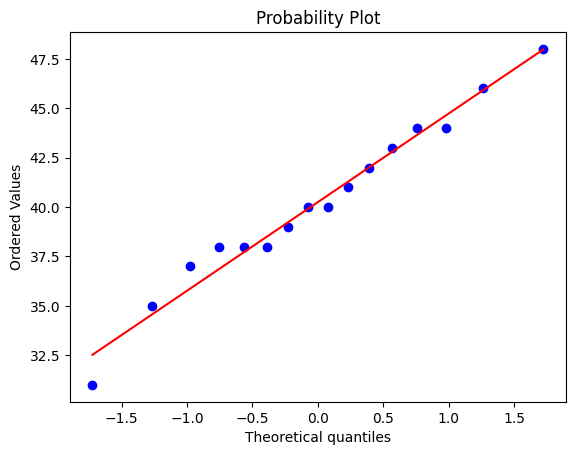

In [161]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns

data = np.array([31, 35, 37, 38, 38, 38, 39, 40, 40, 41, 42, 43, 44, 44, 46, 48])
probplot(data, dist = 'norm' , plot = plt)

# 모평균에 대한 95% 신뢰구간
mean = np.mean(data)
std = np.std(data, ddof = 1)
n = len(data)
df = n -1
confa = 0.05

# conf_t
conf_t = t.ppf(1 - confa / 2 , df)
# SE
se = std / np.sqrt(n)
# ME
ME = conf_t * se
print(mean - ME, mean + ME)
print(t.interval(0.95, df,  loc = mean, scale = se))

# x > 38 검정
m0 = 38
t_stat = (mean - m0) / se
print(t_stat)
p_val = 1  - t.cdf(t_stat, df)
print(p_val)

21그루의 식물이 꽃을 피우는 데 걸리는 기간의 평균이 39일이고 표준편차가 5.1일이었다 꽃이 피는 데 걸리는 평균 기간에 대한 95% 신뢰구간을 구하라

In [162]:
x = 39
s = 5.1
confa = 0.05
n = 21

# SE
se = s / np.sqrt(n)

t.interval(0.95 , n-1 , loc = x , scale = se)


(36.67850783288408, 41.32149216711592)

한 체중감량프로그램은 ‘4개월에 12 kg 감량’이라는 광고를 하였다.
25명의 고객을 대상으로 체중 감량을 조사한 결과  x  =15 kg, s = 5 kg을 얻었다.
가설 H0 :  μ = 12 대 H1 :  μ  > 12에 대하여 유의수준 α= 0.05에서 검정하라

In [163]:
n = 25
x = 15
s = 5

mu = 12
confa = 0.05
df = n - 1

# conf_t
t_val = t.ppf(1 - confa/ 2, df)
# SE
se = s / np.sqrt(s)
# 검정 통계량
t_stat = (x - mu) / se
# p_val
p_val = 1 - t.cdf(t_stat, df)

if t_stat > p_val :
  print('귀무가설기각')
else :
  print('귀무가설채택')


귀무가설기각


### 두 집단 비교

봉지에 과자를 담는 두 대의 기계 A와 B가 있다. 이 두 기계가 담는 과자의 평균무게의 차에 대한 추 론을 하기 위해서 A기계로부터 나온 과자 50봉지, B기계로부터 100봉지의 무게를 조사한 결과 평균이 각각 453g 과 401g 이고 표준편차가 각각 80g과 60g으로 나왔다.이 두기계의 모평균을 각각  μa
 와  μb =  라고 할 때,  μa =   -  μb  의 95% 신뢰구간을 구하라

In [164]:
n1 = 50
n2 = 100

x1 = 453
x2 = 40

s1 = 80
s2 = 60

confa  = 0.05
diff = x1 - x2

# 두 평균의 표준오차
se = np.sqrt((s1 **2 / n1) + (s2 ** 2 / n2))

# 임계값
conf_z = norm.ppf(1 - confa / 2)
# ME
ME = se * conf_z
print(diff - ME, diff + ME)
print(norm.interval(0.95, loc = diff, scale = se))

387.9002142121922 438.0997857878078
(387.9002142121922, 438.0997857878078)


지방의 한 도시에서 작은 개천을 사이에 두고 남북으로 나뉘어 있는 두 지역의 집값을 비교하고자 최근에 매매가 이루어진 집을 대상으로
남쪽에서 13가구, 북쪽에서 11 가구의 집값을 조사하였더니 다음과 같았다.
남쪽: 표본수=13, 표본평균=2.4억원, 표본표준편차=0.72억원
북쪽: 표본수=11, 표본평균=2.15억원. 표본표준편차=0.35억원
유의수준 5%로 두 지역의 집값에 차가 있다고 할 수 있는지 검정하라.

In [165]:
n1 = 13
n2 = 11

x1 = 2.4
x2 = 2.15

s1 = 0.72
s2 = 0.35
confa = 0.05
d0 = 0

# d
d = x1 - x2
# df
df =  n1 + n2 - 2
# pv
pv = (s1**2 * (n1 -1) + s2**2 * (n2-1))/ df
se = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
#conf_t
conf_t = 1 - t.ppf(1 - confa/ 2, df)

# 검정통계량
t_stat = (x1 - x2 - d0) /  se
print(t_stat)

# p_value
p_value = (1 - t.cdf(np.abs(t_stat), df)) * 2
print(p_value)

1.0489579134807328
0.30558491999629345


집단 A과 집단 B로부터 각각 66명, 38명의 어린이를 임의로 뽑아서 그들의 언어능력를 점수로 계산 한 통계량이 다음과 같다. </br>
(1) 두 집단 간 언어능력의 차이가 있는가? (유의수준 a = 0.01로 검정하라.) </br>
(2) 두 어린이 집단의 모평균 점수차에 대한 98% 신뢰구간을 계산하라.

In [166]:
import pandas as pd
from scipy.stats import stats

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/stats/stats1.csv')
df['group'] = df['ID'].str.split('_').str[0]


group_a = df[df.group == 'A']['data']
group_b = df[df.group == 'B']['data']

t_stat, p_val = stats.ttest_ind(group_a , group_b , equal_var = False)
print(p_val)


# 98%의 신뢰구간
a_mean = np.mean(group_a)
b_mean = np.mean(group_b)

a_std = np.std(group_a)
b_std = np.std(group_b)

a_n = len(group_a)
b_n = len(group_b)

diff = a_mean - b_mean
confa = 0.02

# 표준오차
se = np.sqrt((a_std **2 / a_n) + (b_std **2 / b_n))
# t_임계값
t_critical = t.ppf(1 - confa /2 , min(a_n-1 , b_n -1))
# ME
ME = se * t_critical

print(diff - ME , diff + ME)

0.6002726885798457
-22.714770129244116 14.538583526373472


<ipython-input-166-a2e451bda746>:11: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_val = stats.ttest_ind(group_a , group_b , equal_var = False)


여성보다 남성이 작업하는데 시간이 오래 걸린다고 할 수 있는지 검정하라.

In [167]:
import scipy.stats as stats

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/stats/stats2.csv')

df['gender'] = df['ID'].str.split('_').str[0]
df['gender'].value_counts()

m =  df[df['gender'] == 'MALE']['data']
f =  df[df['gender'] == 'FEMALE']['data']



m_mean = np.mean(m)
f_mean = np.mean(f)

m_std = np.std(m)
f_std = np.std(f)
diff = m_mean - f_mean

m_n = len(m)
f_n = len(f)
confa = 0.05
df = n1 + n2 - 2

se = np.sqrt((m_std**2 / m_n) + (f_std**2 / f_n))

#검정통계량
stat = diff/ se
print(stat)

t_stat , p_val = stats.ttest_ind(m,f,  equal_var=False)
print(t_stat ,p_val)

3.2275311510123785
3.189951126116517 0.0020017819882986307


어떤 약의 부작용으로 혈압강하의 효과가 있는지 알아보기 위해서 15명의 환자를 대상으로 약의 복용 전후의 이완기 혈압을 측정하였더니 그 결과가 다음과 같았다. </br>
(1) 평균혈압 전 후 차이값에 대한95% 신뢰구간을 구하라. </br>
(2) 이 자료로부터 약이 혈압을 내린다는 주장을 할 수 있겠는가? 유의수준 1 % 로 검정하라.

In [168]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/stats/stats3.csv')
df['before_after']= df['상태'].str.split(' ').str[1].map({'전':'before' , '후' :'after'})

before = df[df['before_after'] == 'before' ]['혈압']
after = df[df['before_after'] == 'after' ]['혈압']

confa = 0.05
# 차이
diff = before.values - after.values
mean_d = np.mean(diff)
std_d = np.std(diff)
n = len(diff)

# t- 분포 임계값
t_val = t.ppf(1 - confa / 2, df = n -1)
# se
se = std_d / np.sqrt(n)
# ME
ME = t_val * se
print(mean_d - ME , mean_d + ME)


## 1%에서 약이 혈압을 내린다는 가설 검정
# 귀무 : 혈압 감소 차이가 없다
# 대립 : 혈압 감소 차이가 있다.

t_stat , p_val = stats.ttest_rel(before, after)
# 단측 검정 / 2

p_val_one_sided = p_val / 2
print(p_val_one_sided)

2.928174466263884 14.671825533736119
0.0038747180533270594


어떤 화학적인 처리가 씨의 발아비율을 높이는 데 효과가 있는가를 알아보기 위해서 100개의 화학적 으로 처리된 씨와 150개의 처리되지 않은 보통의 씨를 파종하여 발아되는 것을 관찰하였다. 그 결과 화학적으로 처리된 씨 중에서는 88개, 보통의 씨 중에서는 126개가 발아되었다. 화학적으로 처리된 씨와 처리되지 않은 보통의 씨의 발아비율의 차에 대한 95% 신뢰구간을 구하라.

In [173]:
p1 = 88 /100
p2 = 126/150

n1 = 100
n2 = 150

confa = 0.95
# diff
diff = p1 - p2
# SE
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
# conf_z
conf_z = norm.ppf(1 - confa / 2)
# ME
ME = se * conf_z

#신뢰구간
print(diff - ME, diff + ME)

# 라이브러리 검정
import statsmodels.api as sm
n1, n2 = 100, 150
s1, s2 = 88, 126 # 성공횟수

nobs = np.array([n1, n2])
count = np.array([s1, s2])

conf = sm.stats.proportion_confint(count, nobs, alpha = 0.05 , method = 'normal')
print(conf[0][0] , conf[1][1])

0.037229523997570464 0.04277047600242961
0.8163087092715731 0.8986681097645214


두 집단 A와 B에서 각각 100명을 뽑아 약을 투약한 후 효과가 있었는지 설문했다. </br>
(1) 두 집단간 효과 정도가 같은지 검정하라 (유의수준 0.05) </br>
(2) 효과율 (yes응답 비율)의 집단간 차이에 대한 95% 신뢰구간을 구하여라.

In [215]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/stats/stats4.csv')
df['group'] = df['집단'].str.split('_').str[0]

# yes 와 총 표본의 수
yes = df.groupby('group')['응답'].apply(lambda x : (x == '예').sum())
all = df.groupby('group')['응답'].count()

# 두 집단의 효과정도가 같은지 검정
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
count = np.array(yes)
nobs = np.array(all)

z_stat, p_val = proportions_ztest(count, nobs)
print(p_val)

# 차이에 대한 신뢰구간 - 수기 검정
na = df[df['group'] == 'A']['group'].count()
nb = df[df['group'] == 'B']['group'].count()

pa = df[(df['응답'] == '예') & (df['group'] == 'A')]['group'].count() / na
pb = df[(df['응답'] == '예') & (df['group'] == 'B')]['group'].count() / nb

# diff
diff = pa-pb
# se
se = np.sqrt(pa * (1-pa) / na + pb * (1- pb) / nb)
# confa
conf_z = norm.ppf(1- 0.05/2)
# ME
ME = conf_z * se
# 신뢰구간
print(diff - ME, diff + ME)


# 라이브러리
confint = sm.stats.proportion_confint(count, nobs, alpha=0.05)
print(confint[0][0] , confint[1][1])
se

2.7870331884762378e-06
0.1997692789954515 0.46023072100454854
0.5248660051214322 0.3789357279826797


0.06644546636152085

금연패치를 이용하는 것이 금연에 효과가 있는가를 알아보려고 실험을 하였다. 금연을 원하는 80 명의 흡연자들 중에서 임의로 42명을 뽑아서 금연패치를 사용하게 하고 다른 38명의 흡연자들에겐 가짜패치를 사용하게 하였다. 4주 후에 금연패치 사용자 중 27명이, 가짜패치 사용자 중 14명이 담배를 끊었다. 이들 결과로부터 금연패치 사용이 담배를 끊게 하는 비율을 높인다고 할 수 있는가? P—값을 이용하여 답하라

In [228]:
n1 = 42
n2 = 38

p1 = 27/42
p2 = 14/38

confa = 0.05

d = p1 - p2
z_val = norm.ppf(1 - confa/ 2)

# 가설검정
# 합동표본비율
pe = (n1* p1 + n2 * p2) / (n1 + n2)
# 합동분산의 SE
se = np.sqrt(pe * (1 -p) * (1/n1 + 1/n2))

z_sta = d / se
conf_z = norm.ppf(1 - confa/ 2)
p_value = 1 - norm.cdf(z_sta)

if p_value < confa :
  print('귀무가설을 기각, 금연패치가 효과적이다.')
else :
  print('귀무가설을 채택, 금연패치가 효과적이지 않다')

귀무가설을 기각, 금연패치가 효과적이다.


## 범주형 분석

스트레스를 받는 직종에 근무하는 185명에 대한 조사를 통하여 다음과 같은 표를 얻었다. 우울증의 유무와 알콜 중독과 관계가 있는가? 유의수준 α = 0.1로 검정하라.

In [231]:
# 귀무가설(H₀): 우울증 증세와 알코올 중독은 독립적이다 (관계가 없다).
# 대립가설(H₁): 우울증 증세와 알코올 중독은 독립적이지 않다 (관계가 있다).

from scipy.stats import chi2_contingency
data = np.array([[54,27],[22,82]])
chi2, p_value, dof, expected = chi2_contingency(data)

# 결과 출력
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-값: {p_value:.4f}")
print(f"자유도: {dof}")
print("기대값 테이블:")
print(expected)

카이제곱 통계량: 37.1112
p-값: 0.0000
자유도: 1
기대값 테이블:
[[33.27567568 47.72432432]
 [42.72432432 61.27567568]]


사형제도 폐지에 대한 대규모 여론조사 결과와 같은 조사를 임의로 선택한 200명의 법집행관들에게 질문한 결과가 다음과 같다.
이 두 자료로부터 법집행관의 사형제도 폐지에 대한 견해가 일반인과 차이가 있다고 할 수 있는 가? (유의수준 α=0.05)

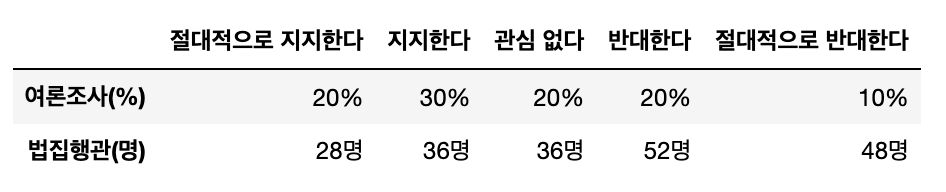

In [232]:
expected_percent = np.array([0.20, 0.30, 0.20, 0.20, 0.10])
total_law_enforcers = 200
observed = np.array([28, 36, 36, 52, 48])

# 기대값 계산 (여론조사 비율에 맞추어 법집행관 수로 기대값 계산)
expected = expected_percent * total_law_enforcers

# 카이제곱 독립성 검정 수행
chi2, p_value, dof, expected_table = chi2_contingency([observed, expected])

# 결과 출력
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-값: {p_value:.4f}")
print(f"자유도: {dof}")
print("기대값 테이블:")

카이제곱 통계량: 21.4228
p-값: 0.0003
자유도: 4
기대값 테이블:


## 비모수 통계
A,B두가지 치료법에 대해 치료의 성공 유무를 나타내는 데이터이다.
치료법이 특정 질병의 치료여부에 영향을 미치는지 검정하려한다.
귀무가설과 대립가설 설정, 오즈비 및 검정결과를 유의수준 0.05하에서 해석하라

In [235]:
from scipy.stats import fisher_exact

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/stats/stats6.csv')

cross = pd.crosstab(df['치료법'], df['치료결과'])
odds , p_val = fisher_exact(cross)

print(p_val)

1.0


두 상점의 5개월간 판매량이 아래와 같다.상점간의 판매량 차이가 존재하는지 검정하라(귀무가설 및 대립가설 설정 검정통계량 확인 및 유의확률에 대한 해석) </br>
상점 A: [15, 20, 18, 10, 22] </br>
상점 B: [12, 17, 14, 16, 11]

In [237]:
A = [15, 20, 18, 10, 22]
B = [12, 17, 14, 16, 11]

# 대응 표본이 아니기 때문에 만 휘트니
stat, p_val = stats.mannwhitneyu(A, B,  alternative='two-sided')